<a href="https://colab.research.google.com/github/ilinashah177/Coursework-Website/blob/main/T_Test_Annual_CO%E2%82%82_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [10]:
from google.colab import files
uploaded = files.upload()

Saving annual-co-emissions-2.csv to annual-co-emissions-2 (1).csv


In [11]:
df=pd.read_csv('annual-co-emissions-2.csv')
df

,Entity,Year,Annual CO₂ emissions
0,Pakistan,1946,633646
1,Pakistan,1947,655283
2,Pakistan,1948,722012
3,Pakistan,1949,1024536
4,Pakistan,1950,5354962
...,...,...,...
73,Pakistan,2019,207622380
74,Pakistan,2020,230754130
75,Pakistan,2021,247901340
76,Pakistan,2022,223834350


STEP 1

HO: There is no difference between mean CO2 Annual CO₂ Emissions from Pakistan pre-2015 and post-2015


H1: There is a difference between mean CO2 Annual CO₂ Emissions from Pakistan pre-2015 and post-2015

STEP 2

We are using a 95% significance level, given there are less than 1000 values in the dataframe we calculate the critical value as follows:

In [13]:
from scipy.stats import t

pre_2015_emissions = df[df['Year'] < 2015]['Annual CO₂ emissions'].values
post_2015_emissions = df[df['Year'] >= 2015]['Annual CO₂ emissions'].values

degrees_of_freedom = len(pre_2015_emissions) + len(post_2015_emissions) - 2

critical_value = t.ppf(0.975, degrees_of_freedom)

print(f"Critical Value: {critical_value}")

Critical Value: 1.9916726096446642


Therefore, our corresponding critical value for a two-tailed t-test in this context is 1.99.

STEP 3: Calculating the Test Statistic as follows:

In [14]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            groups=groups.append(plot_df) # append the dataframe to the list of dataframes
            i+=1 # increase the counter by 1

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals') # add a title

    return t_stat # return the t-statistic

In [16]:
pre_2015_emissions = df[df['Year'] < 2015]['Annual CO₂ emissions']
post_2015_emissions = df[df['Year'] >= 2015]['Annual CO₂ emissions']

t = manual_ttest(pre_2015_emissions,post_2015_emissions)

Group 1: n=69, mean=55730098.565, std=51880427.062
Group 2: n=9, mean=207567702.222, std=28982102.782
The t-statistic is -13.199


STEP 4: Making a Decision

In [19]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

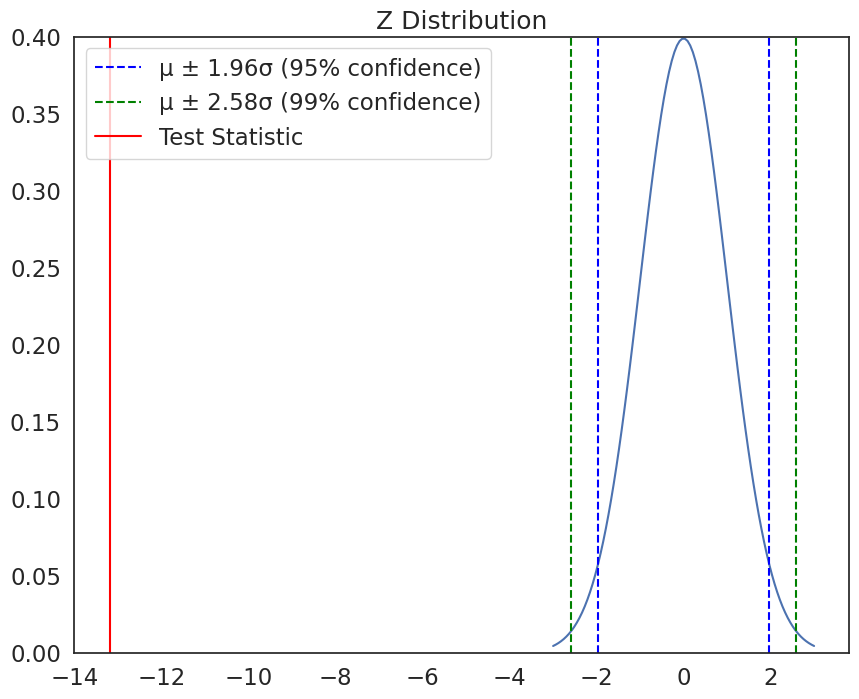

In [20]:
plot_z(t) # plot the test statistic on the z distribution

In [24]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(pre_2015_emissions, post_2015_emissions, equal_var=False)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -13.198902764776628
P-value: 6.211509311180432e-10


We can see from the graph that the t-statistic of -13.2 is significanly smaller than -1.99 indicating the mean number of CO₂ emissions pre-2015 is significantly different to the mean number of CO₂ emissions post-2015. The p-value of less than 0.00001 indicates the same result.

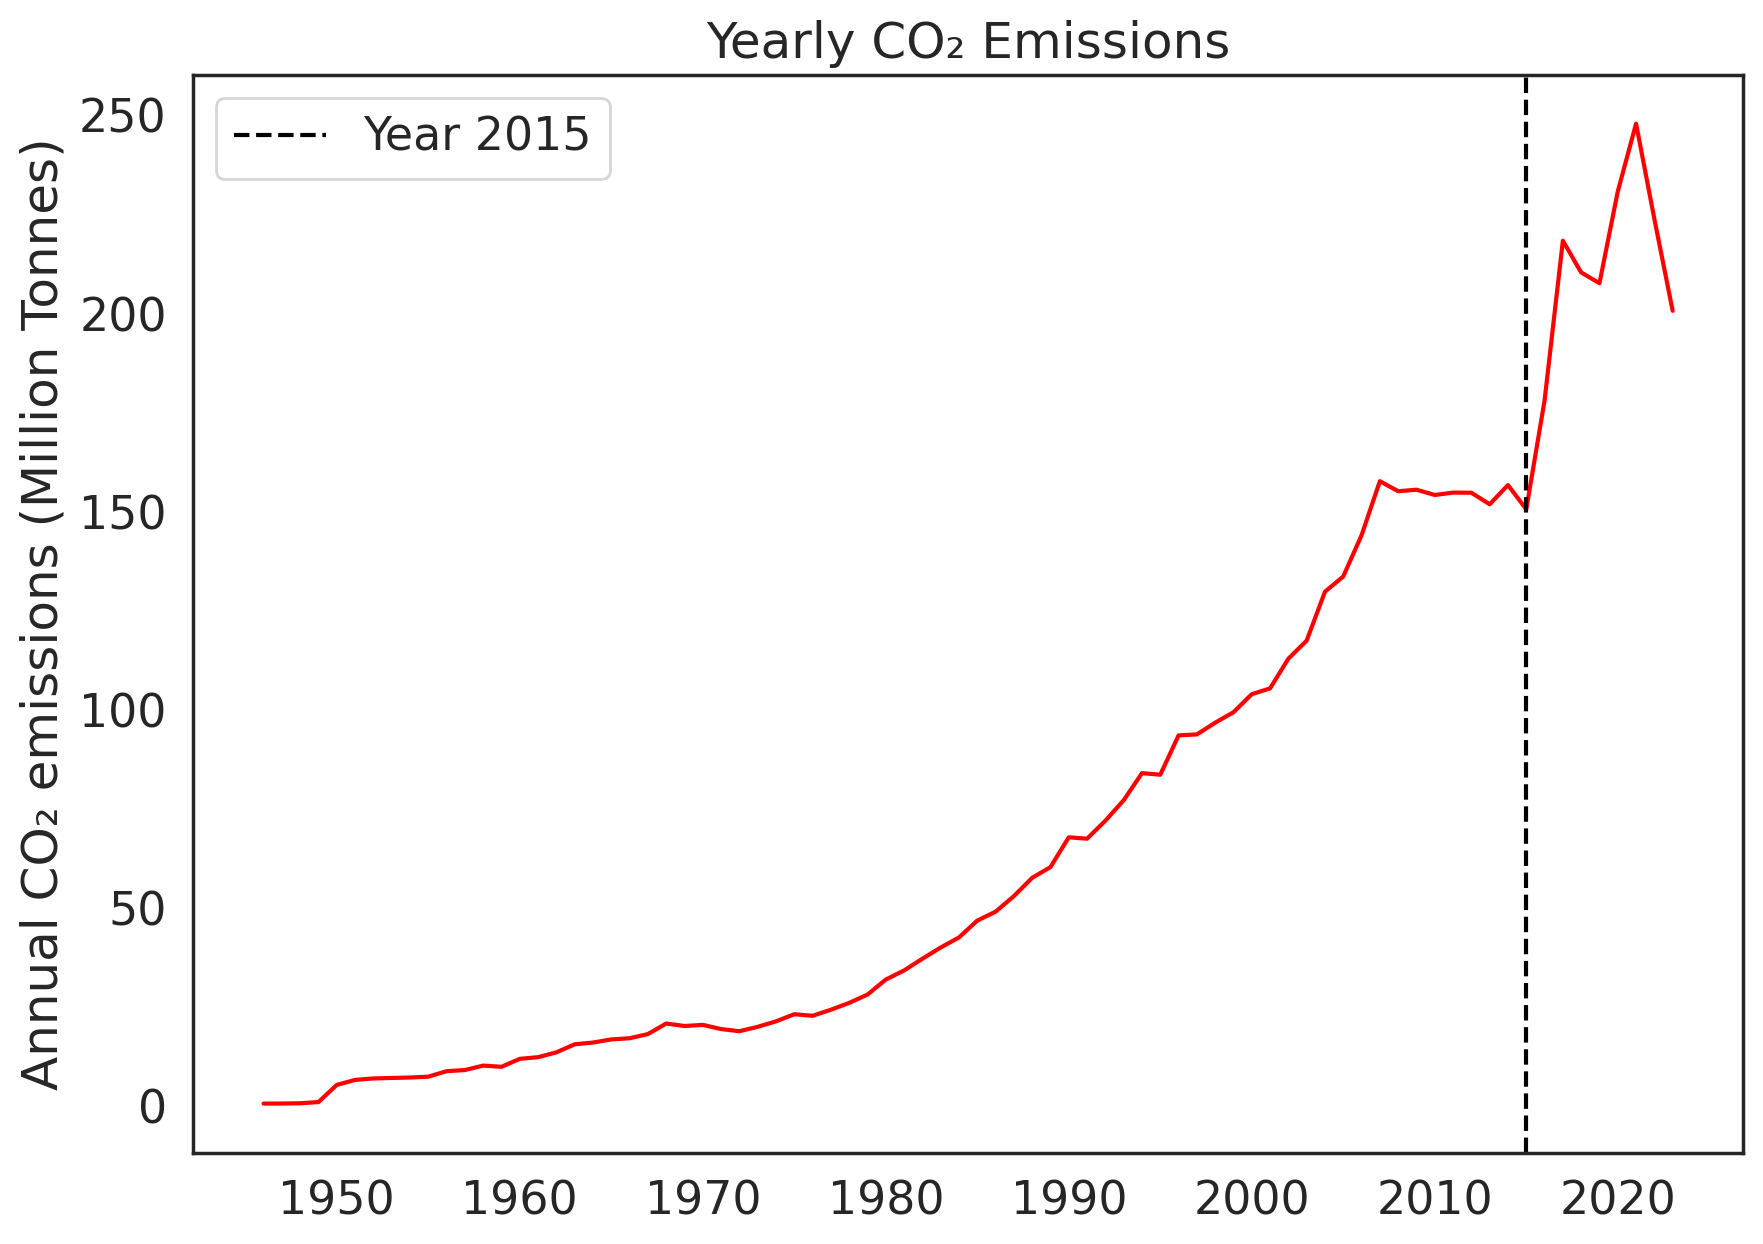

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

figure(figsize=(10, 7), dpi=200)

years = df['Year']
emissions = df['Annual CO₂ emissions']

emissions_millions = emissions / 1000000

plt.plot(years, emissions_millions, color='red')
plt.ylabel('Annual CO₂ emissions (Million Tonnes)')

plt.axvline(2015, color='black', linestyle='dashed', label='Year 2015')

plt.legend()
plt.title('Yearly CO₂ Emissions')

plt.show()



Therefore, our T-test results indicate that the uptick in CO₂ emissions after 2015 (the year CPEC energy investments began in Pakistan) that we can see the above graph, is indeed statistically significant.